In [74]:
# Jupter notebook magic
%matplotlib inline

import geopandas as gpd
from geopandas import GeoDataFrame

import pandas as pd
from shapely.geometry import (Polygon, Point, box)

In [75]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [76]:
modelDomains = { "name" : ["GCM_Kapnick", "WRF_Osmanoglu", "LIS_Kumar"],
                 "colors" : ['blue', 'green', 'purple'],
                 "minLon" : [35, 68, 66.025],
                 "maxLon" : [125, 95, 84.975],
                 "minLat" : [5, 22, 22.025],
                 "maxLat" : [50, 37, 38.975]}
df = pd.DataFrame(modelDomains)
geometry = [Polygon([(minLon, minLat),
                     (minLon, maxLat),
                     (maxLon, maxLat),
                     (maxLon, minLat)]) for minLon,minLat,maxLon,maxLat 
                     in zip(df['minLon'],df['minLat'],df['maxLon'],df['maxLat'])]
gdf = GeoDataFrame(df, geometry=geometry)

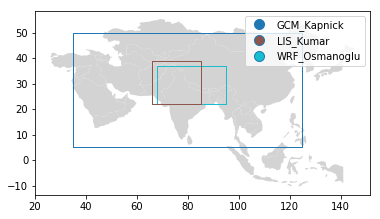

In [77]:
gdf.plot(column = 'name', legend = True, facecolor='none', edgecolor=gdf['colors'], 
         ax=world[world['continent'] == 'Asia'].plot(facecolor = 'lightgray'),
         figsize=(20, 20))